# import Library


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from google.colab import drive

# Import Data


In [2]:
drive.mount('/content/gdrive')
!cd '/content/gdrive/My Drive/'


Mounted at /content/gdrive


In [3]:
df = read_csv('gdrive/My Drive/Trading_Codes/XAUUSD_H4.csv', engine='python')
df.columns = ['Time','Open','High','Low','Close','Volume']
#df.drop(df.columns[[0,2,3,5]], axis=1, inplace=True)

In [ ]:
df['ma_4_quarter'] = df['Close'].rolling(4).mean()

df['ma_8_quarter'] = df['Close'].rolling(8).mean()

df['ma_16_quarter'] = df['Close'].rolling(16).mean()

df['ma_32_quarter'] = df['Close'].rolling(32).mean()

df['ma_96_quarter'] = df['Close'].rolling(96).mean()

df['ma_480_quarter'] = df['Close'].rolling(480).mean()


In [4]:
subset_df = df.loc[26500:]

subset_df.tail(10)


,Time,Open,High,Low,Close,Volume
26665,5/15/2024 0:00,2355.695,2360.895,2354.774,2360.238,240
26666,5/15/2024 4:00,2360.238,2364.838,2355.575,2362.315,240
26667,5/15/2024 8:00,2362.315,2374.175,2361.915,2362.668,240
26668,5/15/2024 12:00,2362.625,2385.665,2351.735,2377.488,240
26669,5/15/2024 16:00,2377.518,2390.188,2376.975,2386.305,240
26670,5/15/2024 20:00,2386.295,2391.815,2385.065,2391.715,180
26671,5/16/2024 0:00,2391.755,2397.275,2386.415,2388.595,240
26672,5/16/2024 4:00,2388.595,2394.388,2384.545,2389.205,240
26673,5/16/2024 8:00,2389.185,2391.255,2380.805,2384.508,240
26674,5/16/2024 12:00,2384.485,2386.125,2370.845,2381.428,240


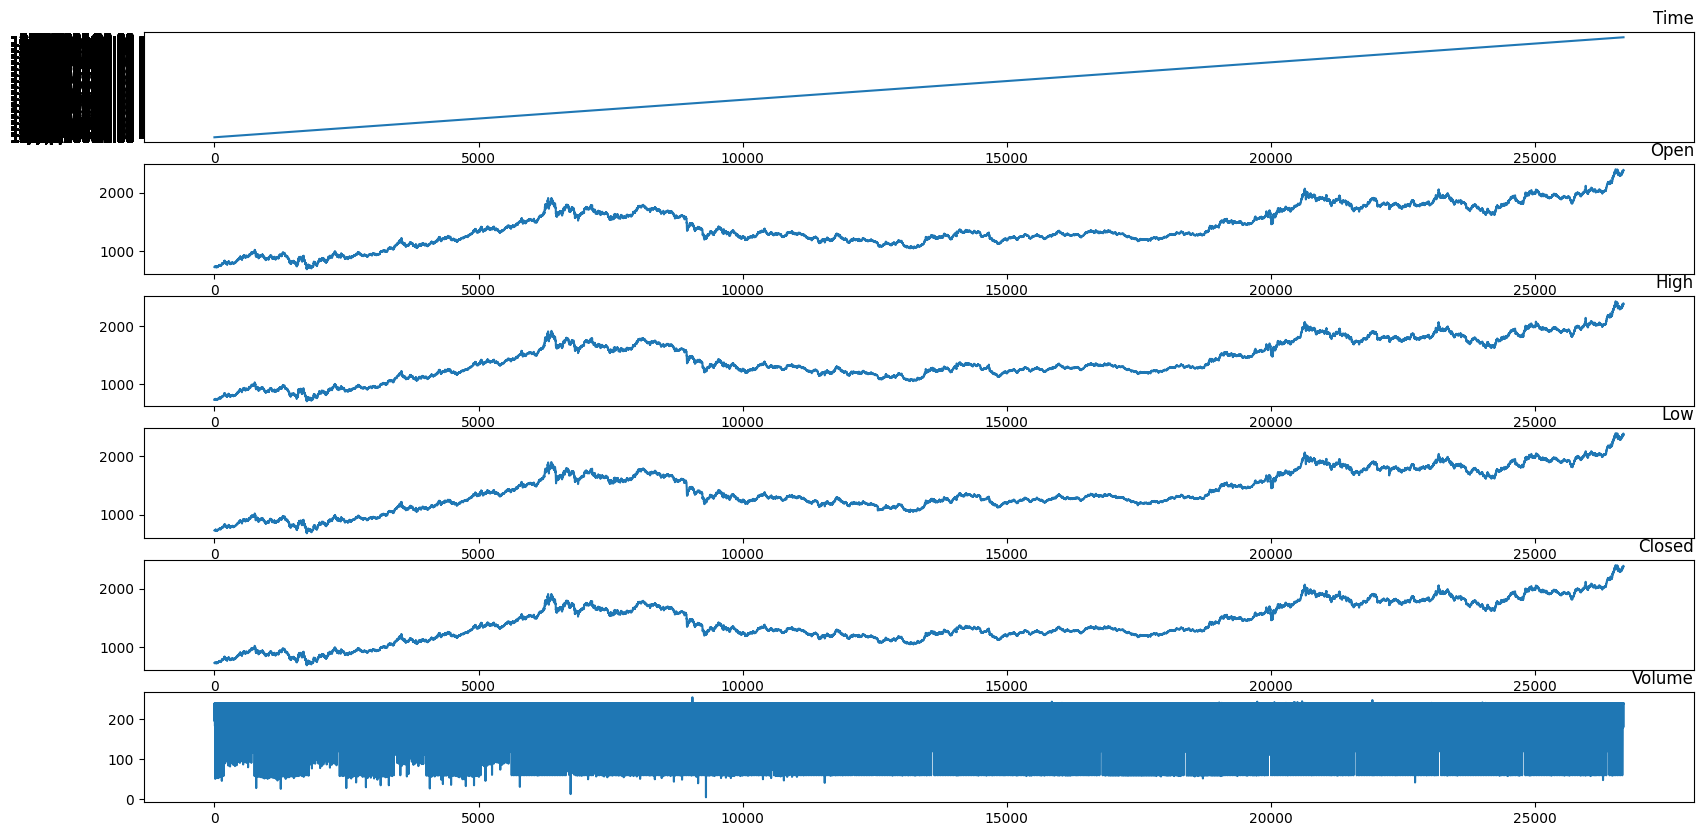

In [ ]:
values = df.values
#groups = [0,1,2,3,4,5,6,7,8,9,10,11,12]
groups = [0,1,2,3,4,5]
i = 1
plt.figure(figsize=(20,10))
for group in groups:
 plt.subplot(len(groups), 1, i)
 plt.plot(values[:26675, group])
 plt.title(df.columns[group], y=1, loc='right')
 i += 1
plt.show()

In [5]:
df.describe()

,Open,High,Low,Close,Volume
count,26675.000000,26675.000000,26675.000000,26675.000000,26675.000000
mean,1420.508838,1424.262781,1416.611839,1420.556486,222.203112
std,340.594905,341.208270,339.934926,340.608479,41.866286
min,693.368000,705.230000,681.999000,693.278000,5.000000
25%,1205.051000,1208.151500,1202.269500,1205.053000,239.000000
50%,1326.321000,1328.896000,1323.171000,1326.335000,240.000000
75%,1723.671000,1727.516000,1717.817500,1723.549000,240.000000
max,2399.875000,2431.385000,2390.315000,2399.865000,255.000000


In [ ]:
# Calculating Corrolation finction and add this feature

# Define the lagged steps
lag_steps = [4, 8, 16, 32, 96, 480]

# Calculate correlations for each lag step
for lag in lag_steps:
    # Shift the 'Close' prices by the lag step
    #df[f'Close_lag{lag}'] = df['Closed'].shift(lag)
    # Calculate correlation between current 'Close' and lagged 'Close'
    df[f'Corr_{lag}'] = df['Close'].corr(df['Close'].shift(lag))

# Drop rows with NaN values resulting from shifting
df.dropna(inplace=True)



In [6]:
df = df[['Close','Volume']]
#df = df[['Time', 'ma_4_quarter',	'ma_8_quarter',	'ma_16_quarter',	'ma_32_quarter',	'ma_96_quarter',	'ma_480_quarter', 'Close']]

In [ ]:
col_list = list(df.columns)
col_list

['Close']

In [ ]:
df[['Close']][10:17]

,Close
10,1523.788
11,1528.968
12,1529.348
13,1569.765
14,1552.605
15,1546.698
16,1545.705


In [7]:
# @title Time_Series_Function
from pandas import DataFrame
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
 """
 Frame a time series as a supervised learning dataset.
 Arguments:
 data: Sequence of observations as a list or NumPy array.
 n_in: Number of lag observations as input (X).
 n_out: Number of observations as output (y).
 dropnan: Boolean whether or not to drop rows with NaN values.
 Returns:
 Pandas DataFrame of series framed for supervised learning.
 """
 n_vars = 1 if type(data) is list else data.shape[1]
 df = DataFrame(data)
 cols, names = list(), list()
 # input sequence (t-n, ... t-1)
 for i in range(n_in, 0, -1):
    cols.append(df.shift(i))
    names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
 # forecast sequence (t, t+1, ... t+n)
 for i in range(0, n_out):
    cols.append(df.shift(-i))
    if i == 0:
        names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
    else:
        names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
 # put it all together
 agg = concat(cols, axis=1)
 agg.columns = names
 # drop rows with NaN values
 if dropnan:
    agg.dropna(inplace=True)
 return agg

In [8]:
values = df.values
data = series_to_supervised(values,4,2)


In [12]:
col_list = list(data.columns)
col_list

['var1(t-4)',
 'var2(t-4)',
 'var1(t-3)',
 'var2(t-3)',
 'var1(t-2)',
 'var2(t-2)',
 'var1(t-1)',
 'var2(t-1)',
 'var1(t)',
 'var2(t)',
 'var1(t+1)']

In [11]:
data.drop(data.columns[[-1]], axis=1, inplace=True)


In [10]:
data


,var1(t-4),var2(t-4),var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),var1(t),var2(t),var1(t+1),var2(t+1)
4,732.617,220.0,729.580,235.0,728.797,240.0,728.175,233.0,727.236,195.0,728.120,229.0
5,729.580,235.0,728.797,240.0,728.175,233.0,727.236,195.0,728.120,229.0,729.297,230.0
6,728.797,240.0,728.175,233.0,727.236,195.0,728.120,229.0,729.297,230.0,733.078,240.0
7,728.175,233.0,727.236,195.0,728.120,229.0,729.297,230.0,733.078,240.0,729.735,240.0
8,727.236,195.0,728.120,229.0,729.297,230.0,733.078,240.0,729.735,240.0,734.223,235.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26669,2360.238,240.0,2362.315,240.0,2362.668,240.0,2377.488,240.0,2386.305,240.0,2391.715,180.0
26670,2362.315,240.0,2362.668,240.0,2377.488,240.0,2386.305,240.0,2391.715,180.0,2388.595,240.0
26671,2362.668,240.0,2377.488,240.0,2386.305,240.0,2391.715,180.0,2388.595,240.0,2389.205,240.0
26672,2377.488,240.0,2386.305,240.0,2391.715,180.0,2388.595,240.0,2389.205,240.0,2384.508,240.0


In [ ]:
AR = [2,4,8,14,16]

"""
for i in AR :
  data[]
"""
#T['ma_4_quarter'] = data[col_list[0]]+data[col_list[1]]+data[col_list[2]]+data[col_list[3]]
print (len(col_list))
'''data['ma_2_quarter'] =
data['ma_4_quarter'] =
data['ma_7_quarter'] ='''

17


"data['ma_2_quarter'] =\ndata['ma_4_quarter'] =\ndata['ma_7_quarter'] ="

* We need to drop unnesecery Features

In [ ]:
data.drop(data.columns[[-2]], axis=1, inplace=True)


In [13]:
List = list(data.columns)
List

['var1(t-4)',
 'var2(t-4)',
 'var1(t-3)',
 'var2(t-3)',
 'var1(t-2)',
 'var2(t-2)',
 'var1(t-1)',
 'var2(t-1)',
 'var1(t)',
 'var2(t)',
 'var1(t+1)']

In [14]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
values = data.values
c_1 = values[:,-1]


X_train, X_test, y_train, y_test = train_test_split(values[:,:-1], c_1, test_size=0.2, shuffle=False)

In [15]:
X_train.shape

(21336, 10)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1))
X_train = scaler.fit_transform (X_train)
X_test = scaler.fit_transform (X_test)
#y_train = scaler.fit (y_train)
#y_test  = scaler.fit (y_test)

In [16]:

X_train = X_train.reshape( X_train.shape[0], 1, 10)
X_test = X_test.reshape( X_test.shape[0], 1, 10)


In [17]:
print (X_train.shape)
print (y_train.shape)

print (X_test.shape)
print (y_test.shape)

(21336, 1, 10)
(21336,)
(5334, 1, 10)
(5334,)


In [18]:
X_train[:10,:]

array([[[732.617, 220.   , 729.58 , 235.   , 728.797, 240.   , 728.175,
         233.   , 727.236, 195.   ]],

       [[729.58 , 235.   , 728.797, 240.   , 728.175, 233.   , 727.236,
         195.   , 728.12 , 229.   ]],

       [[728.797, 240.   , 728.175, 233.   , 727.236, 195.   , 728.12 ,
         229.   , 729.297, 230.   ]],

       [[728.175, 233.   , 727.236, 195.   , 728.12 , 229.   , 729.297,
         230.   , 733.078, 240.   ]],

       [[727.236, 195.   , 728.12 , 229.   , 729.297, 230.   , 733.078,
         240.   , 729.735, 240.   ]],

       [[728.12 , 229.   , 729.297, 230.   , 733.078, 240.   , 729.735,
         240.   , 734.223, 235.   ]],

       [[729.297, 230.   , 733.078, 240.   , 729.735, 240.   , 734.223,
         235.   , 733.371, 183.   ]],

       [[733.078, 240.   , 729.735, 240.   , 734.223, 235.   , 733.371,
         183.   , 736.305, 239.   ]],

       [[729.735, 240.   , 734.223, 235.   , 733.371, 183.   , 736.305,
         239.   , 736.065, 240.   ]],

 

In [ ]:
y_train[:3]

array([1545.705, 1553.465, 1549.315])

# Machine Learnign Model


In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import keras.backend
keras.backend.clear_session()
# Define the model
model = Sequential()

# Add a 1D convolutional layer
#model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(5, 2)))
#model.add(MaxPooling1D(pool_size=2))

# Add a Bidirectional LSTM layer
model.add(Bidirectional(LSTM(units=16, activation = 'relu', input_shape=(1, 10), return_sequences=True)))
model.add(Dropout(0.1))

model.add(Bidirectional(LSTM(units=96, activation = 'relu', return_sequences=True)))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(units=480, activation = 'relu', return_sequences=True)))
model.add(Dropout(0.3))

model.add(LSTM(units=960, activation = 'relu'))

# Add a Dense output layer

model.add(Dense(1))

# Compile the model
model.compile(optimizer='Adam', loss='mean_squared_error')

model.build((None, 1, 10))
# Print the model summary
model.summary()




/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 1, 32)               │           3,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 1, 192)              │          99,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 192)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 1, 960)              │       2,584,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 960)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 960)                 │       7,376,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             961 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,064,449 (38.39 MB)

 Trainable params: 10,064,449 (38.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import keras.backend
keras.backend.clear_session()
# Define the model
mode = Sequential()

# Add a 1D convolutional layer
mode.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=( 1, 32)))
mode.add(MaxPooling1D(pool_size=2))

# Add a Bidirectional LSTM layer
mode.add(Bidirectional(LSTM(units=16, activation = 'relu', return_sequences=True)))
mode.add(Dropout(0.2))

mode.add(LSTM(units=96, activation = 'relu', return_sequences=True))
mode.add(Dropout(0.3))

mode.add(LSTM(units=480, activation = 'relu', return_sequences=True))
mode.add(Dropout(0.4))

mode.add(LSTM(units=960, activation = 'relu'))

# Add a Dense output layer

mode.add(Dense(1))

# Compile the model
mode.compile(optimizer=Adam(learning_rate=0.005) , loss='mean_squared_error')

#mode.build((None, 1, 32))
# Print the model summary
mode.summary()




ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv1d. Consider increasing the input size. Received input shape [None, 1, 32] which would produce output shape with a zero or negative value in a dimension.

In [37]:
# Assuming X_train and y_train are already defined and preprocessed
# X_train shape: (79977, 13, 6)
# y_train shape: (79977,)

# Fit the model to your training data
#tf.config.run_functions_eagerly(True)

history = model.fit(X_train, y_train, epochs=5, batch_size=70, validation_split=0.2)



Epoch 1/5
244/244 ━━━━━━━━━━━━━━━━━━━━ 69s 231ms/step - loss: 231410.2031 - val_loss: 142862.7188
Epoch 2/5
244/244 ━━━━━━━━━━━━━━━━━━━━ 55s 224ms/step - loss: 7244.6240 - val_loss: 202721.7188
Epoch 3/5
244/244 ━━━━━━━━━━━━━━━━━━━━ 57s 234ms/step - loss: 6327.6851 - val_loss: 202110.3281
Epoch 4/5
244/244 ━━━━━━━━━━━━━━━━━━━━ 81s 229ms/step - loss: 5934.1934 - val_loss: 184659.0469
Epoch 5/5
244/244 ━━━━━━━━━━━━━━━━━━━━ 84s 237ms/step - loss: 5008.4824 - val_loss: 178406.3906


In [ ]:
# Assuming X_train and y_train are already defined and preprocessed
# X_train shape: (79977, 13, 6)
# y_train shape: (79977,)

# Fit the model to your training data
#tf.config.run_functions_eagerly(True)

history = mode.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)



Epoch 1/5
2000/2000 [==============================] - 360s 130ms/step - loss: 54086.6797 - val_loss: 672689.9375
Epoch 2/5
2000/2000 [==============================] - 264s 132ms/step - loss: 25137.3457 - val_loss: 441634.1250
Epoch 3/5
  76/2000 [>.............................] - ETA: 3:33 - loss: 21862.6934

KeyboardInterrupt: 

In [ ]:
# Save the model if needed
model.save('bilstm_xauusd_model_M15_16.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


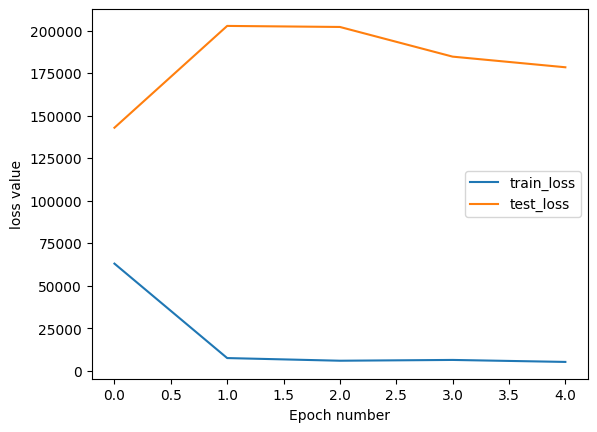

In [38]:
# plot history
fig,ax = plt.subplots()
ax.plot(history.history['loss'], label='train_loss')
ax.plot(history.history['val_loss'], label='test_loss')
ax.set_xlabel('Epoch number')
ax.set_ylabel('loss value')
ax.legend()
plt.show()

In [39]:
y_pred = model.predict(X_test)


167/167 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step


In [40]:
from numpy import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error
# calculate RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmae = sqrt(mean_absolute_error(y_test, y_pred))
print('Test RMSE: %.3f' % rmse)
print('Test RMAE: %.3f' % rmae)

Test RMSE: 519.062
Test RMAE: 22.749


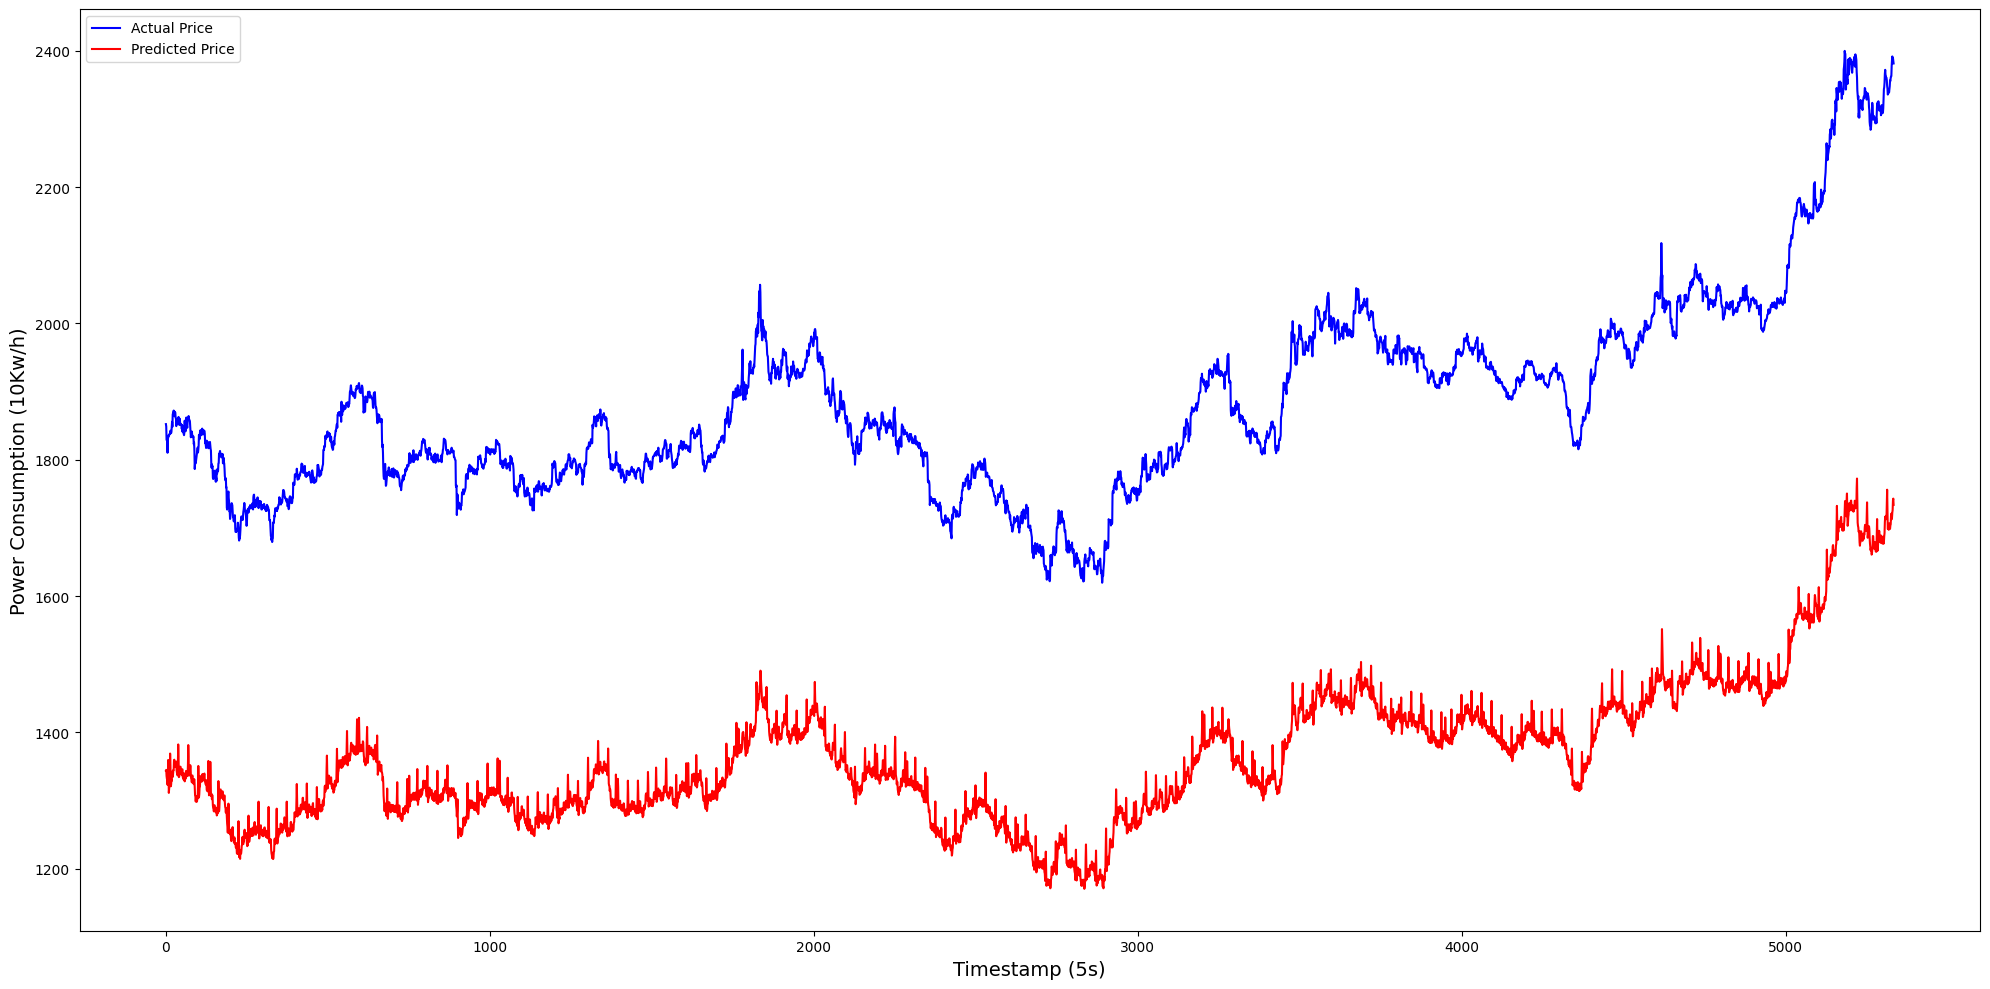

range(0, 5334) range(0, 5334)


In [41]:
a = range(len(y_pred))
b = range(len(y_test))
# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the actual data with a label and title
ax.plot(b, y_test[:], 'b',label='Actual Price')
#ax.set_title('Actual Power Consumption', fontsize=16)  # Set title for the actual data

# Plot the predicted data with a label and title
ax.plot(b, y_pred[:], 'r' ,label='Predicted Price')
#ax.set_title('Predicted Power Consumption', fontsize=16)  # Set title for the predicted data

# Set labels for x-axis and y-axis
ax.set_xlabel('Timestamp (5s)', fontsize=14)
ax.set_ylabel('Power Consumption (10Kw/h)', fontsize=14)

# Display legend
ax.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

print (a,b)

In [ ]:
test = [[[2310.640, 2307.565, 2305.865, 2305.575, 2304.630, 2305.030, 2301.215, 2301.590, 2297.595, 2295.290, 2293.910, 2288.315, 2287.020, 291.090, 2291.590, 2294.015]]]
[[2319.88, 2325.39, 2316.995, 2309.595, 2312.820, 2318.305, 2318.415, 2313.430, 2315.125, 2313.430, 2315.125, 2308.710, 2308.510, 2305.090, 2308.460, 2311.375, 2312.800, 2311.730,]]
test1 = [[[ 2311.730,2310.640, 2307.565, 2305.865, 2305.575, 2304.630, 2305.030, 2301.215, 2301.590, 2297.595, 2295.290, 2293.910, 2288.315, 2287.020, 291.090, 2291.590,]]]
test1

[[[2311.73,
   2310.64,
   2307.565,
   2305.865,
   2305.575,
   2304.63,
   2305.03,
   2301.215,
   2301.59,
   2297.595,
   2295.29,
   2293.91,
   2288.315,
   2287.02,
   291.09,
   2291.59]]]

In [ ]:
X_test[:1]

array([[[1952.045, 1950.175, 1948.835, 1948.344, 1949.125, 1948.235,
         1948.975, 1948.935, 1947.625, 1949.048, 1948.155, 1947.665,
         1948.125, 1946.648, 1947.945, 1948.855]]])

In [ ]:
pred = model.predict(test1)
pred

1/1 [==============================] - 0s 47ms/step


array([[1321.5884]], dtype=float32)

In [ ]:
pred

array([[1881.1608]], dtype=float32)